# Object Detection: Tiny Yolo

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import os
import time
import warnings
from glob import glob
from PIL import Image

import torch

from tiny_yolo import TinyYoloNet
from darknet import MaxPoolStride1
from region_loss import RegionLoss
from utils import *

use_gpu = torch.cuda.is_available()
warnings.filterwarnings("ignore")

## Model

Create model

In [2]:
def load_model(weights=None):
    model = TinyYoloNet()
    if weights:
        model.load_state_dict(torch.load(weights))
    return model.cuda() if torch.cuda.is_available() else model

In [3]:
# create model
model = load_model(weights='weights/tiny-yolo-voc.pth') 
print(model)

TinyYoloNet(
  (loss): RegionLoss(
  )
  (cnn): Sequential(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
    (leaky1): LeakyReLU(0.1, inplace)
    (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True)
    (leaky2): LeakyReLU(0.1, inplace)
    (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    (leaky3): LeakyReLU(0.1, inplace)
    (pool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

In [4]:
class_names = load_class_names('data/voc.names')
print('\n'.join(class_names))

aeroplane
bicycle
bird
boat
bottle
bus
car
cat
chair
cow
diningtable
dog
horse
motorbike
person
pottedplant
sheep
sofa
train
tvmonitor


In [5]:
def predict(model, image_path, save_to=None):
    assert os.path.exists(image_path), 'Error! Input image does not exists.'
    model.eval()
    
    # read image
    img = Image.open(image_path).convert('RGB')
    
    # perform object detection
    tic = time.time()
    boxes = do_detect(model, img.resize((416, 416)), 0.5, 0.4, use_cuda=use_gpu)
    toc = time.time()
    
    # show results
    print("Prediction took {:.5f} ms.".format((toc - tic) * 1000))
    pred_img = plot_boxes(img, boxes, save_to, class_names) 
    return pred_img

Prediction took 1088.10496 ms.
bird: 0.189038


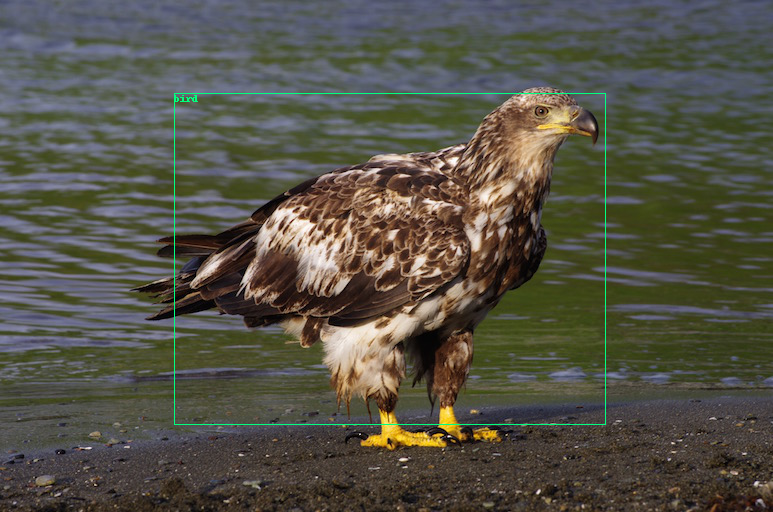

In [6]:
predict(model, 'data/eagle.jpg')

Prediction took 16.04414 ms.
dog: 0.657305
car: 0.345170


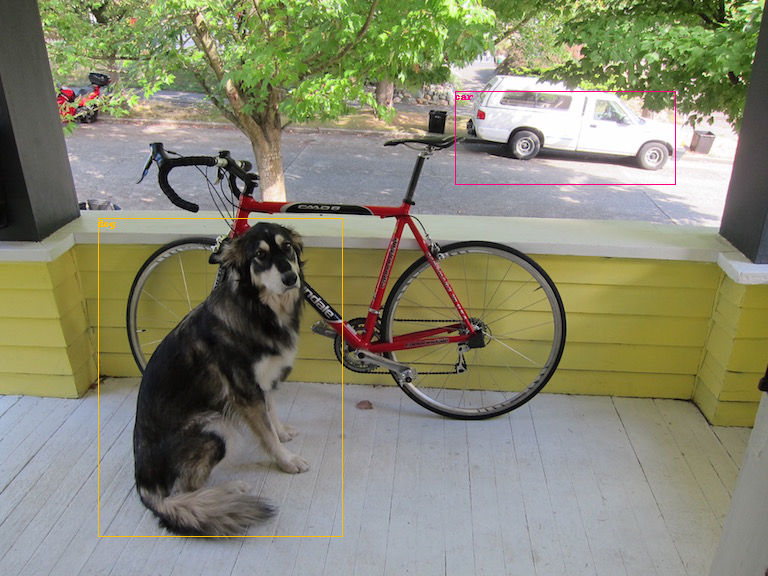

In [7]:
predict(model, 'data/dog.jpg')

Prediction took 15.54155 ms.
cow: 0.093072
sheep: 0.065158
person: 0.565022


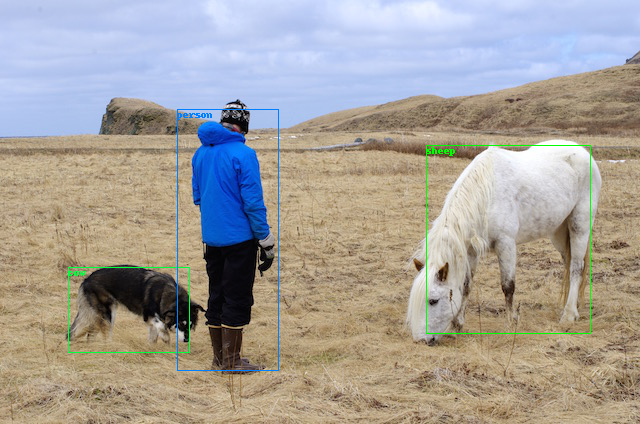

In [8]:
predict(model, 'data/person.jpg')

Prediction took 15.04254 ms.
horse: 0.134987
horse: 0.148027
sheep: 0.202420


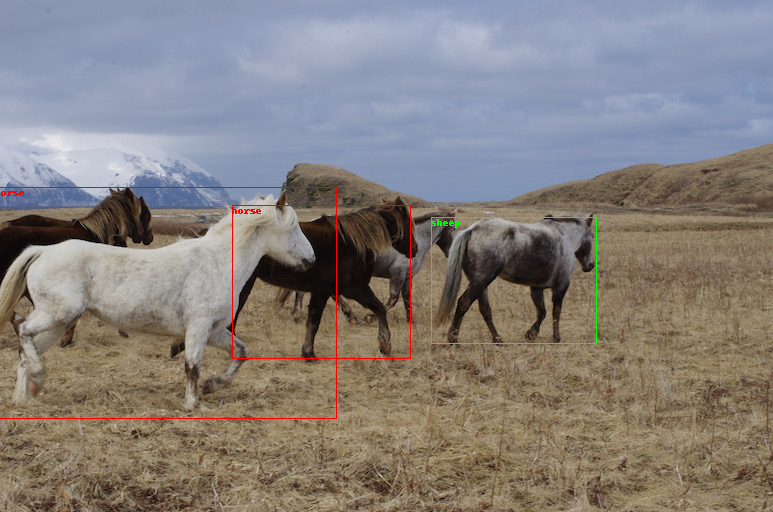

In [9]:
predict(model, 'data/horses.jpg')

Prediction took 16.04438 ms.


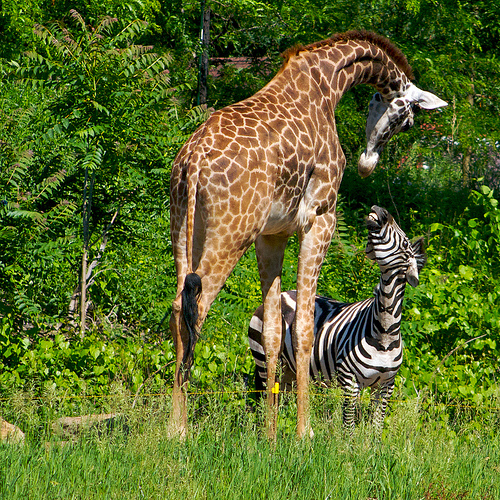

In [10]:
predict(model, 'data/giraffe.jpg')

Prediction took 14.03189 ms.


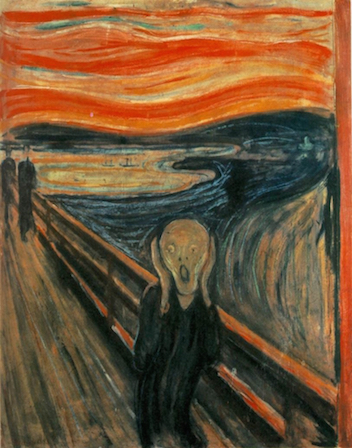

In [11]:
predict(model, 'data/scream.jpg')